In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Fetch The dataset

In [46]:
df_salaries = pd.read_csv('ds_salaries.csv')
df_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Data Processing

In [47]:
df_salaries.shape

(607, 12)

In [48]:
df_salaries.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [49]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


* as we can see it has 0 null values

In [50]:
df_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


#### Insights
* as we can see that we have a column `salary_in_usd`. This means `salary` column and `salary_currency` column is of not much use. 
* There is once column named `Unnamed: 0` which has no explaination regarding the data. 
* Hence we can drop `salary_currency`, `salary` and `Unnamed: 0` columns

In [51]:
df_salaries.drop(['salary', 'Unnamed: 0', 'salary_currency'], inplace=True, axis=1)

In [52]:
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [53]:
df_salaries.shape

(607, 9)

* finally we got 607 rows with 9 columns

#### Let's see how many columns are numeric and how many are categorical

In [54]:
# numerical columns
numerical_cols = [i for i in df_salaries.columns if df_salaries[i].dtype!='object']
numerical_cols 

['work_year', 'salary_in_usd', 'remote_ratio']

In [55]:
# categorical columns
categorical_cols = [i for i in df_salaries.columns if df_salaries[i].dtype=='object']
categorical_cols

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

#### Convert Remote Ratio to a particular categorical mapping

In [56]:
df_salaries['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

* so here there are 3 unique values. Here, 0 can mean On_location, 50 is Hybrid, 100 is Remote. So, let's replace these numerical value with categorical value

In [57]:
df_salaries['remote_ratio'].replace([0,50,100],['HOME','HYBRID','REMOTE'], inplace=True)

In [58]:
df_salaries['remote_ratio'].unique()

array(['HOME', 'HYBRID', 'REMOTE'], dtype=object)

#### Convert experience_level to a exact experience mapping

In [61]:
df_salaries['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

* here MI means mid level, EN is Entry, SE is Senior, Ex is Executive level. SO let's convert it to exact naming.

In [62]:
df_salaries['experience_level'].replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

In [63]:
df_salaries['experience_level'].unique()

array(['Mid', 'Senior', 'Entry', 'Executive'], dtype=object)

#### Convert company_location and employee_residence code to exact location name.

In [59]:
def get_location(code):
    return pycountry.countries.get(alpha_2=code).name
df_salaries['company_location'] =df_salaries['company_location'].apply(get_location)


In [60]:
df_salaries['employee_residence'] =df_salaries['employee_residence'].apply(get_location)


### Exploratory Data Analysis

#### Top Data Science Jobs

In [80]:
jobs = df_salaries.groupby('job_title').size().reset_index().sort_values(ascending=0, by=0).head(10)
jobs

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


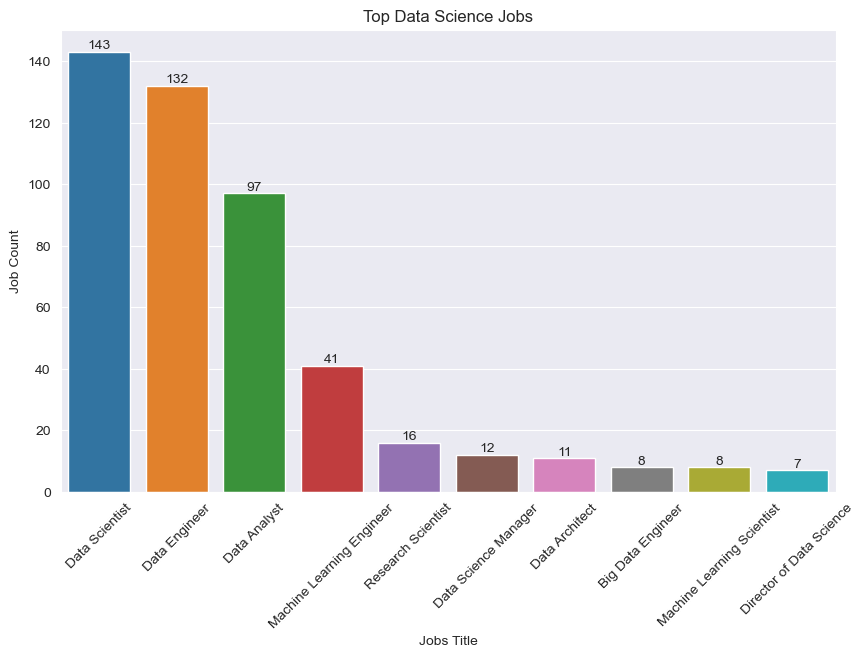

In [90]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
barplt =sns.barplot(data=jobs, x= 'job_title', y = 0)
barplt.bar_label(barplt.containers[0])
plt.title('Top Data Science Jobs')
plt.xlabel('Jobs Title')
plt.ylabel('Job Count')
plt.xticks(rotation = 45)
plt.show()

In [99]:
px.pie(jobs, values = 0, title='Top Data Science Jobs', names = 'job_title')


#### Analyze Experience Level

In [74]:
ex_level = df_salaries['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Experience Level',
                 width=1000, height=400)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

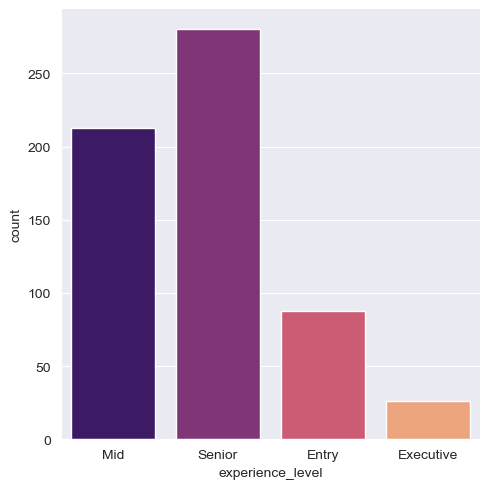

In [101]:
sns.catplot(x='experience_level',data = df_salaries,kind = 'count',palette = 'magma')
plt.show()
plt.pie(x = df_salaries['experience_level'])

In [ ]:
sns.barplot(x=locations.values[:10],y=locations.index[:10],palette = 'magma')
plt.ylabel('Company Location')
plt.xlabel('Counts')
plt.show()